## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Imported seaborn to generate nicer charts
import seaborn as sns
sns.set_theme(style="darkgrid")

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print(f"Number of rows: {df.shape[0]}")

Number of rows: 294478


c. The number of unique users in the dataset.

In [4]:
print(f"Number of unique users: {df.user_id.nunique()}")

Number of unique users: 290584


d. The proportion of users converted.

In [5]:
prop_converted_users = np.round((df.converted.sum() / df.user_id.nunique()) * 100, 2)
print(f"Proportion of converted users: {prop_converted_users}%")

Proportion of converted users: 12.13%


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
no_misaligned_rows = df[
    (df.landing_page == "old_page") & (df.group == "treatment")
].shape[0]
print(f"Number of rows where new_page and treatment don't line up: {no_misaligned_rows}")

Number of rows where new_page and treatment don't line up: 1965


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


<span style="color: red;">There are no rows with missing values.</span>

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

<span style="color: red;">We drop for the rows where the users in the **control** group where served the old page, and users in the **treatment** group were served the new page.</span>

In [8]:
df2 = df[
    ~(
        (df.landing_page == "new_page") & (df.group != "treatment") |
        (df.landing_page != "new_page") & (df.group == "treatment")
    )
]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print(f"Number of unique users: {df2.user_id.nunique()}")

Number of unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[
    df2.user_id.duplicated(keep=False)  # Mark all duplicates as True
].user_id

1899    773192
2893    773192
Name: user_id, dtype: int64

<span style="color: red;">The user with id **773192** is duplicated.</span>

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[
    df2.user_id.duplicated(keep=False)
]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates(
    subset="user_id",  # Only consider the user_id columnb
    keep="first"       # Keep the first of the duplicate rows
)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
df2[
    df2.user_id.duplicated()
]

,user_id,timestamp,group,landing_page,converted


<span style="color: red;">The dataframe is empty, so there are no more duplicates.</span>

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
p_converted = np.round(df2.converted.mean(), 4)
print(f"Probability of conversion: {p_converted}")

Probability of conversion: 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
p_converted_control = np.round(df2[df2.group == "control"].converted.mean(), 4)
print(f"Probability of conversion of control group: {p_converted_control}")

Probability of conversion of control group: 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
p_converted_treatment = np.round(df2[df2.group == "treatment"].converted.mean(), 4)
print(f"Probability of conversion of treatment group: {p_converted_treatment}")

Probability of conversion of treatment group: 0.1188


d. What is the probability that an individual received the new page?

In [18]:
np.round(df2[df2.landing_page == "new_page"].shape[0] / df2.shape[0], 4)

0.5001

<span style="color: red;">That's even odds of receiving the new page. Does this mean that the assignment is random?</span>

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<span style="color: red;">Given that the probability of landing on the new page is almost the same as landing in the old one, we can compare the proportion of conversions of each group. Although the proportion of conversion on the control group is slightly higher than the one of the treatment, the difference is slim, so we don't have enough evidence to state that the new treatment leads to more conversions.<span>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<p style="color: red;">
$$H_{0}: p_{old} >= p_{new}$$
$$H_{1}: p_{old} < p_{new}$$
</p>

<span style="color: red;">The alternative hypothesis $H_{1}$ (the one I'm attempting to prove) is that the conversion rate of the new page is higher than then one of the old page. Given this, the null hypothesis $H_{0}$ is that the conversion rate of the old page is equals or higher than the conversion rate of the old one. Alternatively we can write this as:</span>

<p style="color: red;">
$$H_{0}: p_{old} - p_{new} >= 0$$
$$H_{1}: p_{old} - p_{new} < 0$$
</p>

<span style="color: red;">As we usually dealt with differences during this course.</span>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
p_new = np.round(df2.converted.mean(), 4)
print(f"p_new: {p_new}")

p_new: 0.1196


b. What is the **convert rate** for $p_{old}$ under the null?

In [20]:
p_old = np.round(df2.converted.mean(), 4)  # Same as p_new as per the assumptions
print(f"p_old: {p_old}")

p_old: 0.1196


c. What is $n_{new}$?

In [21]:
n_new = df2[df2.landing_page == "new_page"].shape[0]
print(f"n_new: {n_new}")

n_new: 145310


d. What is $n_{old}$?

In [22]:
n_old = df2[df2.landing_page == "old_page"].shape[0]
print(f"n_old: {n_old}")

n_old: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=(1.0 - p_new, p_new))
new_page_converted

array([1, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=(1.0 - p_old, p_old))
old_page_converted

array([1, 0, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_new_minus_p_old = new_page_converted.mean() - old_page_converted.mean()
print(f"p_new_minus_p_old: {p_new_minus_p_old}")

p_new_minus_p_old: -0.001006817842851837


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = np.array([
    np.random.choice([0, 1], size=n_new, p=(1.0 - p_new, p_new)).mean()  # p_new
    -
    np.random.choice([0, 1], size=n_old, p=(1.0 - p_old, p_old)).mean()  # p_old
    for _ in range(10000)
])
p_diffs

array([-0.00069734,  0.00231051, -0.0001605 , ...,  0.00206268,
       -0.00056633, -0.00105508])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

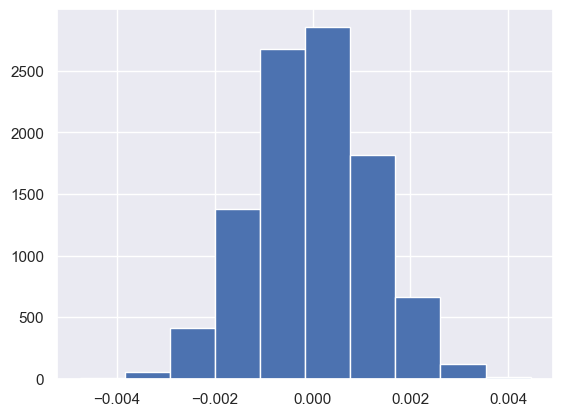

In [27]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
obs_diff = df2[df2.group == "treatment"].converted.mean() -  df2[df2.group == "control"].converted.mean()
print(f"obs_diff: {obs_diff}")

obs_diff: -0.0015782389853555567


In [29]:
p_value = (p_diffs > obs_diff).mean()
print(f"p_value: {p_value}")

p_value: 0.9082


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<span style="color: red;">We've just computed the proportion of samples that are larger than the observed difference. Basically all the area of the following chart that is to the right of the red vertical line:</span>

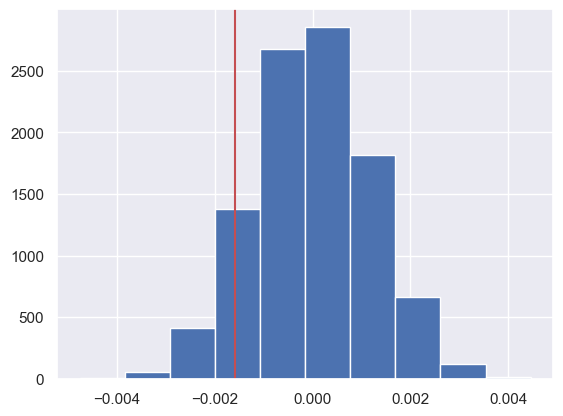

In [30]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color="r");

<span style="color: red;">We call the the *p-value*, which the probability of observing the statistic (or a more extreme value in favor of the alternative hypothesis), which in our case is obs_diff, if the null hypothesis is true.</span>

<span style="color: red;">If this value is lower than specified Type I error rate $\alpha$ (5%, or 0.05 in our case), we can conclude there's enough evidence to reject the null hypothesis $H_{0}$, **which is not the case in our example**. Since the *p-value* in our case was around 0.90, **we failed to reject $H_{0}$**. This is consistent with the artificially chosen values for $p_{old}$ and $p_{new}$.</span>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2[(df2.landing_page == "old_page") & df2.converted].shape[0]
convert_new = df2[(df2.landing_page == "new_page") & df2.converted].shape[0]
n_old = df2[df2.landing_page == "old_page"].shape[0]
n_new = df2[df2.landing_page == "new_page"].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [32]:
ztest_nobs = [n_new, n_old]
ztest_nobs

[145310, 145274]

In [33]:
ztest_count = [convert_new, convert_old]
ztest_count

[17264, 17489]

In [34]:
z_score, p_value = sm.stats.proportions_ztest(
    count=ztest_count,
    nobs=ztest_nobs,
    value=0,
    alternative="larger"
)

In [35]:
print(f"z_score: {z_score:.4f}")
print(f"p_value: {p_value:.4f}")

z_score: -1.3109
p_value: 0.9051


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<span style="color: red;">The values are consistent with those ovtained in the previous sections, and it is still larger than our chosen $\alpha$ value of 0.05, so we would still fail to reject the null.</span>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<span style="color: red;">We've got no choice but to use a Logistic Regression, as the response variable is categorical.</span>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2["intercept"] = 1

In [37]:
df2["ab_page"] = pd.get_dummies(df2.group).treatment

In [38]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
mod = sm.Logit(df2["converted"], df2[["intercept", "ab_page"]])
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-08-20 00:35 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<span style="color: red;">The *p-value* for ``ab_page`` is ``0.1899`` as per the model summary. It's different from the *p-value* on the previous section because the hypotheses were one-sided before, while on the logistic regression we're dealing with a two-sided alternative. For this new model the hypothesis are:</span>

<p style="color: red;">
$$H0: p_{new}−p_{old} = 0$$
$$H1: p_{new}−p_{old} \neq 0$$
</p>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<span style="color: red;">The only other source of information is the ``timestamp`` column. I could extract categorial information from it, like hour of day, the day of the week, whether it's a weekday or not, the month, the season, etc. The problem with this approach is that there might be a correlation between these new variables (for instance, between the day of the week and whether it's weekday or not), and even correlation between the new variables and the old ones. We don't know how the landing page is assigned (it's usually assigned randomly), but what happens if we only performed the test on certain days?</span>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [42]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [43]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [44]:
df_new[["CA", "UK"]] = pd.get_dummies(df_new.country)[["CA", "UK"]]  # I chose US as the baseline

In [45]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [46]:
mod = sm.Logit(df_new["converted"], df_new[["intercept", "ab_page", "CA", "UK"]])
res = mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2022-08-20 00:36 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

<span style="color: red;">Given the *p-values* for the country dummy variables (``0.1295`` and ``0.4573``), it doesn't seem they have an impact on the conversion.</span>

<span style="color: red;">What CAN say is that users from Canada (``CA``), are 0.96 times ($e^{-0.0408}$) as likely to convert (holding all other variables equal) than users from the United States (``US``), which is our chosen baseline. Users from the United Kingdom (``UK``) are 1.01 ($e^{0.0099}$) times as likely to convert than users from the U.S. Given this numbers, it is clear that the country as very little influence over the conversion rate.</span>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

<span style="color: red;">With this setup we're trying to determine whether the relationship between the conversion and the ab_page variables is dependent on the country of origin.</span>

In [47]:
df_new["ab_page_UK"] = df_new.ab_page * df_new.UK
df_new["ab_page_CA"] = df_new.ab_page * df_new.CA

In [48]:
# We include the interaction as well as the lower order dummy variables
mod = sm.Logit(df_new["converted"], df_new[["intercept", "ab_page", "CA", "UK", "ab_page_UK", "ab_page_CA"]])
res = mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-08-20 00:36 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
ab_page_UK    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
ab_page_CA   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

<span style="color: red;">As with the other models, none of the *p-values* are small enough to reject the null, indicating that there's little influence over the response variable.</span>

<a id='conclusions'></a>
## Conclusions

<span style="color: red;">Even though we've performed multiple analysis and fitted a couple of tests in an attempt to determine whether the new page does lead to a higher proportion of conversions, we failed time and time again to reject the null hypothesis of the old page being equal or better at this. With this in mind, **we have no evidence that supports adopting the new page**.</span>

<span style="color: red;">There are a few things that merit further analysis. Have we designed the expirement to tackle change aversion and novelty effect? Let's analyse the duration of the experiment:</span>

In [49]:
timestamps = pd.to_datetime(df2.timestamp)
print(f"Duration: {timestamps.max() - timestamps.min()}")

Duration: 21 days 23:59:49.081927


<span style="color: red;">Are 22 days enough? We cannot be sure as we lack the subject matter knowledge, and details about the experiment.</span>

<span style="color: red;">Our users are only from the US, UK and Canada. Maybe there's a cultural bias? Have we considered expanding the experiment to other countries (assuming we do have users somewhere else, obviously).</span>

<span style="color: red;">Even if we had a statistical model that supported the migration to the new page, we don't have enough information regarding the actual experiment to gauge whether this has *practical significance*:</span>

* <span style="color: red;">Is the difference in conversions high enough to merit a migration?</span>
* <span style="color: red;">The cost of the migration is lower can be supported by the increase in the proportion of migration?</span>
* <span style="color: red;">Does the migration also attracts more visitors that would lead to a higher total number of conversions?</span>

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.